# Optimization in Data Science Part 2

Referenced Textbook: https://cobweb.cs.uga.edu/~jam/scalation_guide/comp_data_science.pdf

Specifically Appendix A (Starting Page 619)

## Stochastic Gradient Descent (SGD)

Stochastic means "randomly determined; having a random probability distribution or pattern that may be analyzed statistically but may not be predicted precisely."

So we can guess that with STOCHASTIC graditent descent it will involve taking random samples. Indeed this is what we are doing. Now, we introduced the idea of mini-batches to the gradient decent algorithm. 

However, since we are now only taking random samples of our data instances. This introduces or could introduce a significant amount of noise in our data.

For example, if we had the following:

![](../pics/sgd/mbe.jpg)

In this case, if we used pure gradient decent we use all the data in every epoch, but if we use a randomly sampled mini-bach (denoted in green above) we get a much less cohesive looking graphical shape. Thus, we can see while SGD does significantly lower computational overhead it does introduce noise.

This is why it is important for the alrogithm to be robust and not necessarily the most efficient as in a more deterministic setting.

We also need to now address another distinction: Pure Stochastic Gradient Descent (PSGD) vs Stochastic Gradient Descent (SGD)

In both cases, we are creating a mini batch as described above, however, now we need to decide if we will update our weights for every data instance or just once for the full mini-batch.

PSGD updates for every data instance in the mini-batch. 
SGD updates once per mini-batch by using an average of the gradients

Since, PSGD is similar to what we have done before and because SGD is a pretty foundational algorithm in Data Science, we will impliment SGD.

This is a core algorithm for data science, and as such, I figured we would graduate a bit from our previous example for gradient decent and focus on a data science related problem. 

I will use SGD to optimize a perceptron (which is the simplest form of neural network). We will not focus on the particulars of the perceptron in this video, but if you are curious you can watch my video on perceptron linked in the description of this video. 

## Diagram

![](../pics/sgd/sgd_dia.jpg)

## Perceptron Code with SGD

In [268]:
import numpy as np
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np
import math

### Intializing Data

In [269]:

# 10 data points: one x1 x2 y
xy = np.matrix (
[[1.0, 0.0, 0.0, 0.5],
[1.0, 0.0, 0.5, 0.3],
[1.0, 0.0, 1.0, 0.2],
[1.0, 0.5, 0.0, 0.8],
[1.0, 0.5, 0.5, 0.5],
[1.0, 0.5, 1.0, 0.3],
[1.0, 1.0, 0.0, 1.0],
[1.0, 1.0, 0.5, 0.8],
[1.0, 1.0, 1.0, 0.5],
[1.0, 1.0, 1.0, 0.6]]
)

# Taking first 3 columns of xy as matrix
x = xy[:,0:3]

# Taking last column of xy as array
y = xy[:, 3]

# Initializing B matrix
b = np.matrix (
[[0.1],
[0.2],
[0.1]]
)

### Finding SST

In [270]:
# Create a function to find SST 

def getSST (target):
    
    # Finding the sum of squares total
    y_mean = np.mean (target)
    sst = 0

    for each in target:
        sst = sst + (each - y_mean) ** 2

    # This just pulls the sst value out of the matrix to make it easier to work with
    sst = np.ndarray.item(sst)
    
    return sst
    

### Assigning Batches

In [271]:
# Create a function to randomly break data in batches based on batch size
# This function ensures that all data will be represented in a batch and that each batch is randomly selected

def makeBatches(data, bs):
    
   num_batch = math.ceil(data.shape[0] / bs)
    
   pos_choices = range(0, data.shape[0])
   
   rand_list = np.random.choice(pos_choices, data.shape[0], False)
   
   batch_list = np.split(rand_list, num_batch)
      
   return batch_list

### Getting Values for Batches

In [272]:
# Create a function to actually get value from original training set based on batch_list

def getBatchVals(batch):
    
    batch_vals_x = []
    batch_vals_y = []
    
    for each in batch:
        batch_vals_x.append((x[each][:]).tolist()[0])
        batch_vals_y.append((y[each][:]).tolist()[0])

    batch_vals_x = np.matrix(batch_vals_x)
        
    return batch_vals_x, batch_vals_y
    

### Updating Weights

General equations we are using blow:

![](./pics/sgd/sgd_eqn.jpg)

In [273]:
# Create a function to update our weights

def updateWeightsPercept (x, y, b, eta):
    
    # Pre-activation vector
    u = np.dot(x, b)
    
    # Predicted value vector
    y_hat = activations.sigmoid(u)
    
    # Negative error vector
    e = y - y_hat
    
    # Correction vector (delta or d)
    d = - e * (y_hat * (1 - y_hat))
    
    # Gradients vector
    grad = np.transpose(x).dot(d)
    
    # Updated weights vector
    b = b - eta * grad    
    
    # Sum of squared errors
    sse = np.sum(e * e)
    
    return b, sse
    

### Setting Hyperparametes

In [274]:

# Setting new_parms = b so original value will not get over written
new_parms = b

# Lists to hold values for plotting
sse_list = []
rsq_list = []
x_list = []

# Find SST
sst = getSST(y)

# Set max epochs
max_iters = 100

# Set bath size
batch_size = 5

# Set learning rate
eta = 1

### Preforming SGD

In [275]:

# Outer loop handles interations for epochs
for i in range(0, max_iters):
    
    # Randomly getting list of index positions of origional data for batches
    batch_list = makeBatches(x, batch_size)
    
    # Inner loop iterated through all batches of data in each epoch
    for batch in batch_list:
        
        # Getting data associated with each batch
        batch_vals_x, batch_vals_y = getBatchVals(batch)
        
        # Updating our weights once per batch
        new_parms, sse = updateWeightsPercept(batch_vals_x, batch_vals_y, new_parms, eta)

    # Appending all to lists so we can plot later
    x_list.append(i)
    sse_list.append(sse)
    rsq_list.append(1-sse/sst)

### Plots

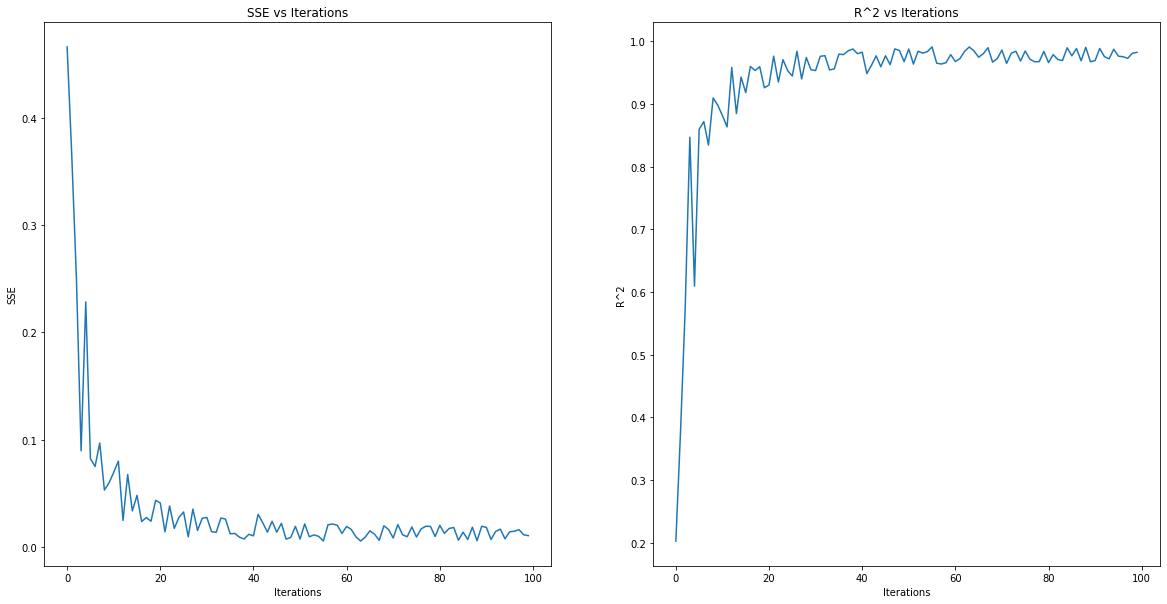

In [276]:

# To plot our findings

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x_list, sse_list)
plt.title('SSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(x_list, rsq_list)
plt.title("R^2 vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('R^2')


plt.show()